### Student names and ID:
### Group ID: 

# Linear Regression using the life expectancy dataset. 

Linear regression is a very common technique to link a set of features of real valued variables $\mathbf{x}=(x_1, \ldots, x_d)$ to a real value outcome $y$. The hypothesis with the linear regression model is that the outcome variable is a linear combination of the features, to with a gaussian noise is added:

$$
\begin{align}
Y  & = w_0 + \sum_{i=1}^{d} w_i \cdot x_i  + \varepsilon, & \varepsilon &\sim \mathcal{N}(0, \sigma^2)\\
Y & = \mathbf{\tilde{X}}^{T} \cdot \mathbf{W}  & \mathbf{\tilde{X}}^T &= (1, X_1, X_2, \ldots, X_d)
\end{align}
$$

The goal of this project is to explore the different aspects of linear regression on a traditional multivariate dataset from the Global Health Observatory (GPO) from the World Health Organization (WHO) which keeps track of the health status as well as many other related factors for all countries. The data-set relates life expectancy, to different health factors for 193 countries and as been collected from the same WHO data repository website and its corresponding economic data was collected from the United Nation website. The different datasets were merged and made available on the [Kaggle platform](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) which is what we use now. 

After a little of data cleaning and exploiration, we will estimate parameters of the model and evaluate its predictive power. We will use linear regression and regularized (ridge) regression.


The project is divided into the following tasks:
  1. Data loading, cleaning.
  2. Short dive into data exploration.
  3. Implementation of linear regression, relationship with correlation, and interpretation of the coefficients.
  4. Regularization using ridge regression and the effect of the regularization parameter on the fit.
  5. Comparison of the different models by assessing the quality of their prediction.
  6. (optional) Reproduction of the analysis within the `sklearn` framework and extension of the results.

## Task 1: Data loading and cleaning

### Data loading
We start by reading in the data table, have a look at the first rows, and clean up possible mistyping in column names.

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)
pd.set_option("display.width", 1000)

In [2]:
# Use pandas.read_csv() method
data = pd.read_csv('data.csv')

## 2938 observations, 22 features
print("Size of the table: ", data.shape)
# display first 20 rows
data.head(20)

Size of the table:  (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


Some columns are hidden due to their number. We can print all of the columns with ```pandas.DataFrame.columns```:

In [3]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling'], dtype='object')

After taking a good look at the column labels, you may notice that some trailing whitespace are remaining on the column names (_e. g._ `'Measles '`). <br>
Use the  [```.strip()``` method](https://docs.python.org/3.4/library/stdtypes.html#str.strip) to clean up column names

In [4]:
print(data.columns)

data.columns = data.columns.str.strip()

print(f'\n Columns stripped: {data.columns}')

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling'], dtype='object')

 Columns stripped: Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling'], dtype='object')


### Data Cleaning

We will perform an additional cleaning step on the dataset by handling missing values. 
Proper preprocessing of the columns ensure that we will be able to make the most of the data (even if it comes at the cost of altering it a little). We will identify columns with missing data, and apply a simple technique of filling the real missing values with the mean of the same countries (e.g., mean imputation, forward fill, or regression-based imputation). 

We are using a simple method, but multiple other techniques exist and  can be applied (check the method [`pandas.DataFrame.fillna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna)):
  - mean imputation, we fill the missing values with the means of the corresponding columns. We will use this method after a grouping by country.
  - forward fill, we fill each missing value based on the last valid observation. This is a general technique that works with any data type. 
  - regression based imputation is directly related to the theme of this project, so we will avoid it at this step.

Here, we will only work with columns containing real values and we will use the mean of each country to fill the missing value.

Are there any countries for which this technique is not applicable? If yes, figure out how you could deal with the remaining missing values.

> Yes, there are countries for which this technique is not applicable. These are the countries that have all missing values for a given column. In such cases, the mean cannot be calculated, and thus cannot be used for imputation. To deal with the remaining missing values, we could consider using the overall mean of that column across all countries.
>
> Looking at the whole dataset to impute missing values before splitting into train/test sets could lead to data leakage, as information from the test set would influence the training process. To avoid this, we should first split the dataset into training and testing sets, and then perform imputation separately on each set.

In [5]:
# Identify columns with missing values and report their count
missing_data = data.isnull().sum()

print(missing_data)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [6]:
# Fill missing values with mean for numeric columns
# Compute a mean for each country to fill the data

data_filled = data.copy()
numeric_cols = data_filled.select_dtypes(include=[np.number]).columns
country_means = data_filled.select_dtypes(include=[np.number]).groupby(data_filled['Country']).mean()

for col in numeric_cols:
    if data_filled[col].isnull().sum() == 0:
        continue
    mean = country_means[col]
    for country in data_filled['Country'].unique():
        country_mean = mean[country]
        num_nans = data_filled[(data_filled['Country'] == country) & (data_filled[col].isnull())].shape[0]
        if num_nans == 0 or pd.isna(country_mean):
            continue
        data_filled.loc[(data_filled['Country'] == country) & (data_filled[col].isnull()), col] = country_mean

remaining_nans = data_filled[numeric_cols].isnull().sum()

if remaining_nans.sum() > 0:
    for col in numeric_cols:
        if data_filled[col].isnull().sum() > 0:
            global_mean = data_filled[col].mean()
            data_filled[col] = data_filled[col].fillna(global_mean)

print("Final missing values check:")
print(data_filled.isnull().sum())

Final missing values check:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


## Task 2: Data visualization and exploration

It is also important to visualize first the basic properties of the data by simply looking at it. (It is crucial for accurate modeling and analysis).
Here, we will simply produce boxplots as one dimensional summary plots of a few variables, and then assess some of the interaction between the variables with a pair plot. Exploratory data analysis of such a data set could be possible but would require a complete separate project. 

### Boxplots as a visualization tool

Use boxplots to summarize the distributions for the variables `Life Expectancy`, `BMI`, and `GDP`. 

You should observe a few number of outliers for `Life Expectancy` and `GDP`. Have a look at the properties of the outliers and characterize them rapidly.

> GDP: The distribution shows a low median with 50% of countries clustered near the lower range, indicating that most countries have relatively modest GDP values. However, there are numerous high-value outliers representing wealthy nations, revealing significant economic inequality across the dataset.

> Life Expectancy: The distribution is more diverse around the median than the GDP, but fewer outliers exist. This time on the lower end, representing countries with significantly reduced life expectancy.

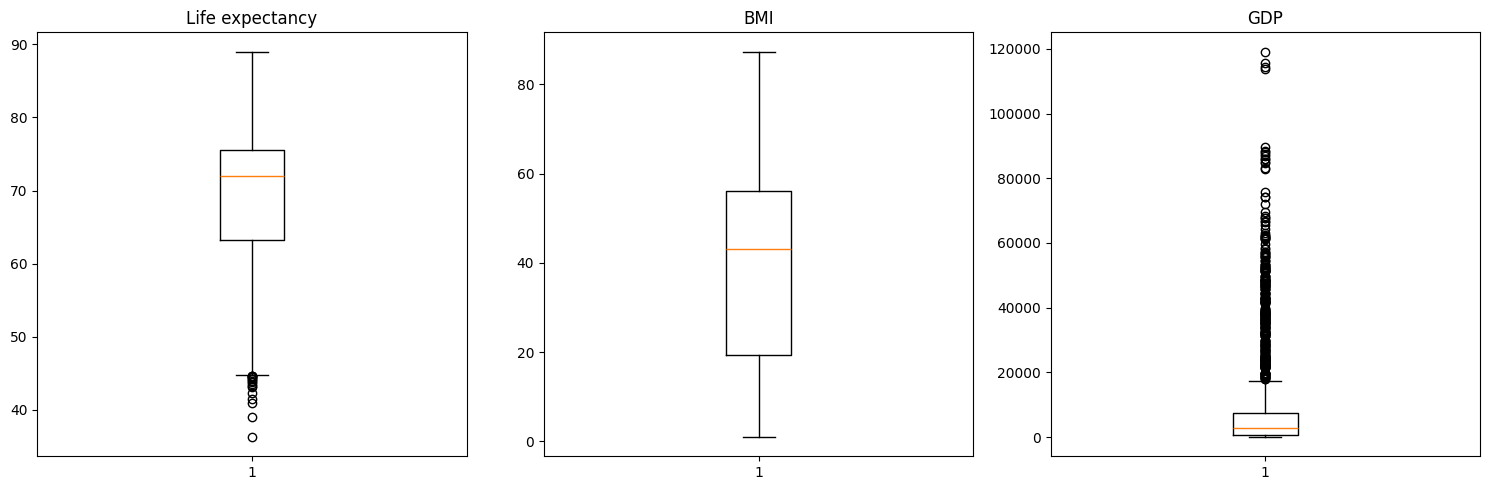

In [7]:
# Boxplot to detect outliers
key_variables = ['Life expectancy', 'BMI', 'GDP']

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(key_variables):
    col_data = data_filled[col]
    # display(col_data.describe())
    axes[i].boxplot(col_data)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### line plots and Pair plots

- First check how the life expectancy evolved for a few countries with a line plot.
- Produce a pair plot of the variables `Life expectancy`, `BMI`, `GDP`, `Alcohol`, and `Schooling`. You can consider using the `Status` of the country or the `Year` as a way to color the plot. (plotly.express function `scatter_matrix`).

- What do you observe at a first visualization on the data? For instance you can comment on:
  - The relationship between `Life expectancy` and `Status`, 
  - The relationship between `Life expectancy` and `Schooling`,
  - The distribution of `BMI`.


> The relationship between `Life expectancy` and `Status` shows that countries with a "Developed" status generally have higher life expectancies compared to those with a "Developing" status.
> The relationship between `Life expectancy` and `Schooling` indicates a positive correlation, where higher levels of schooling are associated with increased life expectancy.
> The distribution of `BMI` appears to be rather dissimilar across both "Developed" and "Developing" countries.

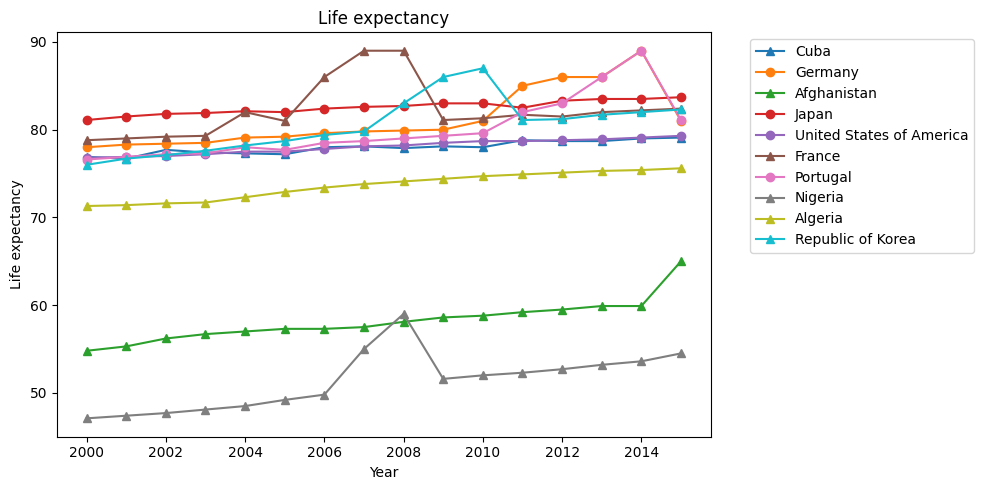

Developed countries are represented with circles (o) and developing countries with triangles (^).


In [8]:
### Example of countries but you can select an other set
var = "Life expectancy"
cchoice = ['Cuba','Germany', 'Afghanistan', 'Japan', 'United States of America' ,
           'France', 'Portugal', 'Nigeria', 'Algeria', 'Republic of Korea' ]
years = data_filled['Year'].unique()
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
for choice in cchoice:
    country_data = data_filled[data_filled['Country'] == choice]
    var_data = country_data[var]
    status = country_data['Status'].iloc[0]
    marker = 'o' if status == 'Developed' else '^'
    axes.plot(years, var_data, marker=marker, label=choice)
axes.set_title(var)
axes.set_xlabel('Year')
axes.set_ylabel(var)
axes.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
print("Developed countries are represented with circles (o) and developing countries with triangles (^).")

In [9]:
variables = ['Life expectancy', 'BMI', 'GDP', 'Alcohol', 'Schooling']

fig = px.scatter_matrix(data_filled,
                        dimensions=variables,
                        color='Status',
                        title='Pair Plot of Key Variables Colored by Status',
                        )
fig.update_traces(diagonal_visible=False)
fig.update_layout(width=1200, height=1200)
# make marker a  little smaller
fig.update_traces(marker=dict(size=5))
fig.show()

## Task 3: Correlation and Its Interpretation

### Description
This task focuses on working first the computation of the variable correlations and understanding how it relates to regression coefficients. The standard correlation measure can identify key relationships in the data but must be interpreted with care. 

### Question:
   - Compute the correlation between `Life Expectancy` and the following variables. Is positive or negative?
     - `Alcohol` consumption.
     - `Schooling`.
     - `BMI`.
   - Do you find some of the correlation values to be unusual? Again, split the data by some characteristic, such as the variable `Status` and explain the results obtained.

> All correlations are positive. The highest correlation is found between `Life Expectancy` and `Schooling`, indicating that higher levels of education are strongly associated with longer life expectancy. The correlation between `Life Expectancy` and `BMI` is moderate, suggesting that while there is a positive relationship, it is not as strong as with schooling. The correlation between `Life Expectancy` and `Alcohol` consumption is the lowest among the three, indicating a weaker positive association. However, it is important to note that correlation does not imply causation, and these relationships should be interpreted with caution. Don't drink and drive!

In [10]:
variables = ['Life expectancy', 'Alcohol', 'Schooling', 'BMI']

corrs = pd.DataFrame(index=variables, columns=variables, dtype=float)
p_values = pd.DataFrame(index=variables, columns=variables, dtype=float)
for var1 in variables:
    for var2 in variables:
        if var1 == var2:
            p_values.loc[var1, var2] = 0.0
            corrs.loc[var1, var2] = 1.0
        else:
            corr_test = stats.pearsonr(data_filled[var1], data_filled[var2])
            corrs.loc[var1, var2] = corr_test[0]
            p_values.loc[var1, var2] = corr_test[1]
print("Correlation Matrix:")
display(corrs)

print("\nP-Values Matrix:")
display(p_values)

Correlation Matrix:


,Life expectancy,Alcohol,Schooling,BMI
Life expectancy,1.000000,0.404155,0.715066,0.559255
Alcohol,0.404155,1.000000,0.511973,0.327565
Schooling,0.715066,0.511973,1.000000,0.508105
BMI,0.559255,0.327565,0.508105,1.000000



P-Values Matrix:


,Life expectancy,Alcohol,Schooling,BMI
Life expectancy,0.000000e+00,7.272659e-116,0.000000e+00,1.946430e-241
Alcohol,7.272659e-116,0.000000e+00,4.615782e-196,1.941008e-74
Schooling,0.000000e+00,4.615782e-196,0.000000e+00,1.168113e-192
BMI,1.946430e-241,1.941008e-74,1.168113e-192,0.000000e+00


In [11]:
developed = data[data['Status'] == 'Developed']
developing = data[data['Status'] == 'Developing']

# report the correlations after stratification
for group_name, group_data in [('Developed', developed), ('Developing', developing)]:
    print(f"\nCorrelation Matrix for {group_name} countries:")
    corrs_group = pd.DataFrame(index=variables, columns=variables, dtype=float)
    for var1 in variables:
        for var2 in variables:
            if var1 == var2:
                corrs_group.loc[var1, var2] = 1.0
            else:
                corr_value = group_data[var1].corr(group_data[var2])
                corrs_group.loc[var1, var2] = corr_value
    display(corrs_group)


Correlation Matrix for Developed countries:


,Life expectancy,Alcohol,Schooling,BMI
Life expectancy,1.000000,-0.287769,0.395210,-0.043962
Alcohol,-0.287769,1.000000,-0.003140,0.144934
Schooling,0.395210,-0.003140,1.000000,0.119754
BMI,-0.043962,0.144934,0.119754,1.000000



Correlation Matrix for Developing countries:


,Life expectancy,Alcohol,Schooling,BMI
Life expectancy,1.000000,0.203429,0.688119,0.555682
Alcohol,0.203429,1.000000,0.387171,0.193541
Schooling,0.688119,0.387171,1.000000,0.527155
BMI,0.555682,0.193541,0.527155,1.000000


> Looking at the correlations split by `Status`, we observe that the relationships between `Life Expectancy` and `Alcohol` is negative for "Developed" countries, while it remains positive for "Developing" countries. This suggests that in developed countries higher alcohol consumptions has more stronger impact on the life expectancy compared to developing countries. The relationship between `Life Expectancy` and `Schooling` remains positive for both groups, but is stronger in "Developing" countries. The correlation between `Life Expectancy` and `BMI` remains positive for "Developing" countries, but is negative for "Developed" countries, indicating that higher BMI is associated with lower life expectancy in developed nations.

## Task 4: Simple Regression Implementation

### Description
This task involves implementing a simple linear regression model. To simplify the application of the model we will implement it as a regression class that contains one attribute `self.coefficients` that corresponds to the vector $\mathbf{W}$ (with the term for the bias $w_0$ being the first value).

You are required to complete the code for a regression class that includes methods for fitting, predicting, and evaluating the model.

We make the hypothesis that the matrix of correlations is of full rank.  



### Exercise
#### **Complete the Class**:
   - Fill in the missing methods (`fit`, `predict`, and `evaluate`) in the provided `LinRegModel` class (the `__str__` method is provided). Note that the solution of the linear regression is provided in the lecture slides. 
   - For the evaluate method, it will compute two indicators:
     - the Mean Squared Error `MSE`: 
      $$
      \frac{1}{n} \sum_{i=1}^{n} (y_i - \mathbf{X}^T_i\cdot \mathbf{W})^2
      $$ 
     - the R squared `rsquared` ($\bar{y}$ is the sample mean $\bar{y} = \frac{1}{n}\sum_i y_i$): 
      $$
      R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \mathbf{X}^T_i\cdot \mathbf{W})^2 }{\sum_i{(y_i - \bar{y})^2} }
      $$
   - Ensure the implementation follows the principles of linear regression using the closed-form solution.


In [12]:
class LinRegModel:
    def __init__(self):
        """Initialize the Linear Regression model."""
        self.coefficients = None
        self.variables = None

    def __str__(self):
        """ summary of the coefficients """
        return "Coefficients:\n" + str(self.coefficients) + "\nVariables: " + ", ".join(self.variables)

    def fit(self, X, y):
        """
        Train the linear regression model using the closed-form solution.

        Parameters:
        X: np.ndarray
            The feature matrix (shape: (n_samples, n_features)).
        y: np.ndarray
            The target vector (shape: (n_samples)).
        """
        X = np.array(X.values, dtype=np.float64)
        y = np.array(y.values, dtype=np.float64)
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.coefficients = (np.linalg.inv(X.T @ X) @ X.T @ y).flatten()
        self.variables = ['Intercept'] + [f'X{i}' for i in range(1, X.shape[1])]        

    def predict(self, X):
        """
        Make predictions using the trained model.

        Parameters:
        X: np.ndarray
            The feature matrix (shape: [n_samples, n_features]).

        Returns:
        np.ndarray
            The predicted values (shape: [n_samples]).
        """
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_pred = X @ self.coefficients
        return y_pred

    def evaluate(self, X, y):
        """
        Evaluate the model using Mean Squared Error and R-squared metrics.

        Parameters:
        X: np.ndarray
            The feature matrix (shape: [n_samples, n_features]).
        y: np.ndarray
            The true target values (shape: [n_samples]).

        Returns:
        dict
            A dictionary with MSE and R-squared metrics.
        """
        X = np.array(X.values, dtype=np.float64)
        y = np.array(y.values, dtype=np.float64)
        y = y.flatten()

        y_pred = self.predict(X)

        MSE = np.mean((y - y_pred) ** 2)

        ss_residual = np.sum((y - y_pred) ** 2)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        rsquared = 1 - (ss_residual / ss_total)
        
        return {'MSE': MSE, 'rsquared': rsquared}
    

In [13]:
### You can test the estimation of the model
variables = ['Alcohol', 'Schooling', 'BMI']
vout = ['Life expectancy']
Xtest = data_filled[variables]
y = data_filled[vout]

lm = LinRegModel()

lm.fit(Xtest, y)

## Tests
print(lm)
mse, rsquared = lm.evaluate(Xtest, y).values()
print("MSE:", mse, "R-squared:", rsquared)

Coefficients:
[44.30226495  0.06533558  1.65426035  0.12480977]
Variables: Intercept, X1, X2, X3
MSE: 39.4326197427958 R-squared: 0.5636268591408022


## Task 5: Regression Analysis and Evaluation

#### 1. Spliting  the Dataset
- We will divide the dataset into training and testing sets:
  - Use the first 7 years 2000 to 2006 as the **training set**.
  - Use the next three year 2007-2009 as the **testing set**.



In [14]:
train_data = data_filled[data_filled['Year'] <= 2006]
test_data = data_filled[(data_filled['Year'] >= 2007) & (data_filled['Year'] <= 2009) ]

print(f"Training set size: {train_data.shape}")
print(f"Testing set size: {test_data.shape}")

Training set size: (1281, 22)
Testing set size: (549, 22)


#### 2. Experiment with Predictor Sets
- Use different combinations of predictors to train and evaluate the regression model. Below are some suggested sets of predictors:

  **Set A (Healthcare and Mortality)**:
  - `Adult Mortality`, `Infant deaths`, `Total expenditure`

  **Set B (Lifestyle and Education)**:
  - `Alcohol`, `BMI`, `Schooling`

  **Set C (Economic Factors)**:
  - `GDP`, `Income composition of resources`, `Population`

  **Set D**
  - Union of set A, set B, and set C


- Train the model on each predictor set using the **training data** and evaluate its performance on the **testing data**.
- **Deliverable**: For each predictor set, report:
  - Mean Squared Error (MSE)
  - $R^2$ score
  - A brief explanation of the observed performance and an analysis of the coefficients



> Results for Set A: MSE = 40.02857999316729, R-squared = 0.5327566677637867
> Set A has the second highest MSE and a moderate R-squared value, indicating that while the model captures some variance in life expectancy, it is less effective than Set D. The coefficients suggest that higher adult mortality and infant deaths negatively impact life expectancy, while increased total expenditure has a positive effect.

> Results for Set B: MSE = 37.247422285723566, R-squared = 0.5652204072949479
> Set B shows a slightly better performance than Set A, with a lower MSE and higher R-squared. The coefficients suggest that factors like alcohol consumption, BMI, and schooling have a meaningful impact on life expectancy.

> Results for Set C: MSE = 43.00917343830765, R-squared = 0.4979649660949662
> Set C has the highest MSE and the lowest R-squared value, indicating that economic factors alone are less predictive of life expectancy compared to healthcare and lifestyle factors. The coefficients indicate that GDP and income composition have a positive effect, while population has a negative effect.

> Results for Set D: MSE = 22.021524146872252, R-squared = 0.7429484052379279
> Set D, which combines all predictors, shows the best performance with the lowest MSE and highest R-squared value. This suggests that a comprehensive model incorporating healthcare, lifestyle, and economic factors provides the most accurate predictions of life expectancy. The coefficients reflect the combined influence of all these factors.

In [15]:
## Predictor variables
predictors_sets = {
    "Set A": ["Adult Mortality", "infant deaths", "Total expenditure"],
    "Set B": ["Alcohol", "BMI", "Schooling"],
    "Set C": ["GDP", "Income composition of resources", "Population"]
}

predictors_sets["Set D"] = [x for l_var in predictors_sets.values() for x in l_var]

## Running the models
results = {}
for set_name, predictors in predictors_sets.items():
    print(f"\nEvaluating model with {set_name} predictors: {predictors}")
    
    X_train = train_data[predictors]
    y_train = train_data['Life expectancy']
    
    X_test = test_data[predictors]
    y_test = test_data['Life expectancy']
    
    lm = LinRegModel()
    lm.fit(X_train, y_train)
    
    metrics = lm.evaluate(X_test, y_test)
    
    results[set_name] = metrics
    
    print(lm)
    
    print(f"Results for {set_name}: MSE = {metrics['MSE']}, R-squared = {metrics['rsquared']}")


Evaluating model with Set A predictors: ['Adult Mortality', 'infant deaths', 'Total expenditure']
Coefficients:
[ 7.27891798e+01 -4.61442576e-02 -9.66952367e-03  5.58574430e-01]
Variables: Intercept, X1, X2, X3
Results for Set A: MSE = 40.02857999316729, R-squared = 0.5327566677637867

Evaluating model with Set B predictors: ['Alcohol', 'BMI', 'Schooling']
Coefficients:
[45.30036994  0.05897237  0.1701874   1.39832223]
Variables: Intercept, X1, X2, X3
Results for Set B: MSE = 37.247422285723566, R-squared = 0.5652204072949479

Evaluating model with Set C predictors: ['GDP', 'Income composition of resources', 'Population']
Coefficients:
[ 5.41026977e+01  2.23972726e-04  2.10735189e+01 -2.03982579e-09]
Variables: Intercept, X1, X2, X3
Results for Set C: MSE = 43.00917343830765, R-squared = 0.4979649660949662

Evaluating model with Set D predictors: ['Adult Mortality', 'infant deaths', 'Total expenditure', 'Alcohol', 'BMI', 'Schooling', 'GDP', 'Income composition of resources', 'Populati

#### 3. Analyze the Best Model

From the results you obtained above you can now answer the following questions:

  1. Identify which predictor set yielded the best performance.
  2.  Answer the following questions:
  - What are the most significant predictors based on this analysis?
  - How does the inclusion or exclusion of certain variables affect model performance?
  - For countries with low life expectancy (<65), based on the coefficients estimated for each variable prediction, comment the effect of their change on lifespan?


**Answers**

1. The predictor set that yielded the best performance is Set D, which combines all predictors. It has the lowest Mean Squared Error (MSE) and the highest R-squared value, indicating that it captures the most variance in life expectancy.
    
2. Answers:
    - The most significant predictor based on the different sets, appears to be `Schooling` from Set B, as it has a strong positive correlation with life expectancy. Which could also be seen in the pairplot early on. Additional significant predictors include `Adult Mortality` and `Infant deaths` from Set A, which have strong negative coefficients, indicating that higher mortality rates are associated with lower life expectancy.
    
    - The inclusion of a comprehensive set of variables (Set D) significantly improves model performance compared to using individual sets (A, B, or C). Excluding certain variables leads to higher MSE and lower R-squared values, indicating that the model is less effective at predicting life expectancy when not all relevant factors are considered.
    
    - For countries with low life expectancy (<65), changes in the coefficients estimated for each variable can have a substantial impact on lifespan. For instance, reducing Adult Mortality and Infant deaths would likely lead to an increase in life expectancy. Similarly, increasing Total expenditure on healthcare, improving Schooling levels, and enhancing economic conditions (higher GDP and Income composition) would also contribute positively to lifespan. Conversely, high Alcohol consumption and BMI may negatively affect life expectancy in these countries.

#### 4. Residual analysis

Residual analysis is an essential part of validating and understanding your linear regression model. Residuals 
(the difference between observed and predicted values) help you assess how well your model fits the data, 
identify patterns in the errors, and detect outliers or influential points. 

For this part it is enough to consider only the model built with the set A of variables. 

Residuals $e_i$ are defined in the following way:
$$
e_i = Y - \mathbf{W}\cdot \tilde{\mathbf{X}} 
$$

Many diagnostic plots can be made from the study of the residuals, we will only concentrate visualising if the gaussian assumption for the noise $e_i \sim \mathcal{N}(0, \sigma^2)$ is fullfilled. 

#### Questions 

   1. Plot the predicted values $\hat{y_i}$ against the square-root of the residuals $\sqrt{e_i}$. What would you expect if the residuals are normally distributed?
   2.  An other way to assess the agreement with the normal distribution is to perform a [quantile-quantile plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) (or Q-Q plot). The quantile-quantile plot reports as a scatter plot the quantiles of your scaled residuals against the quantiles of a normal distribution. Do a Q-Q plot of the data points.


> 1. In the plot of predicted values against the square-root of the residuals, if the residuals are normally distributed, we would expect to see a random scatter of points around the mean of square-root residuals without any discernible pattern. This indicates that the residuals have constant variance and are independent of the predicted values. 

> 2. In the Q-Q plot of the scaled residuals against the quantiles of a normal distribution, if the residuals are normally distributed, we would expect the points to fall approximately along a straight line.

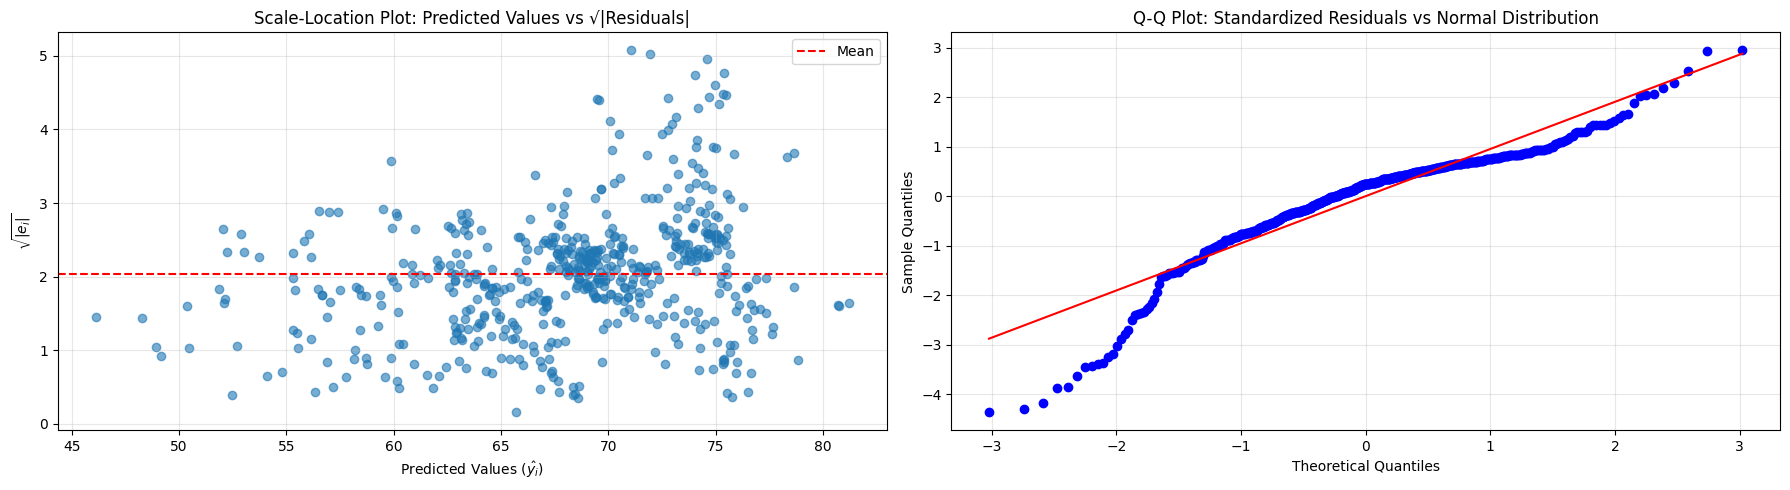


Residual Statistics:
Mean of residuals: 1.3018
Std of residuals: 6.1914
Mean of √|residuals|: 2.0325


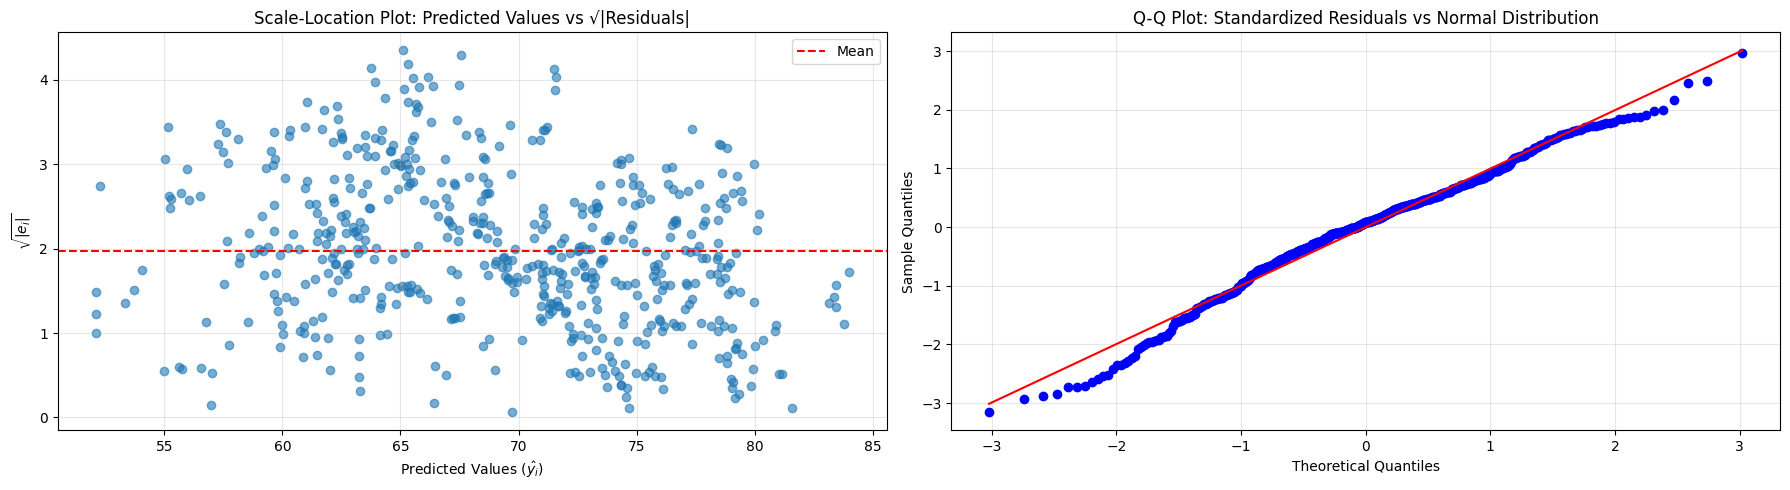


Residual Statistics:
Mean of residuals: 0.3513
Std of residuals: 6.0929
Mean of √|residuals|: 1.9744


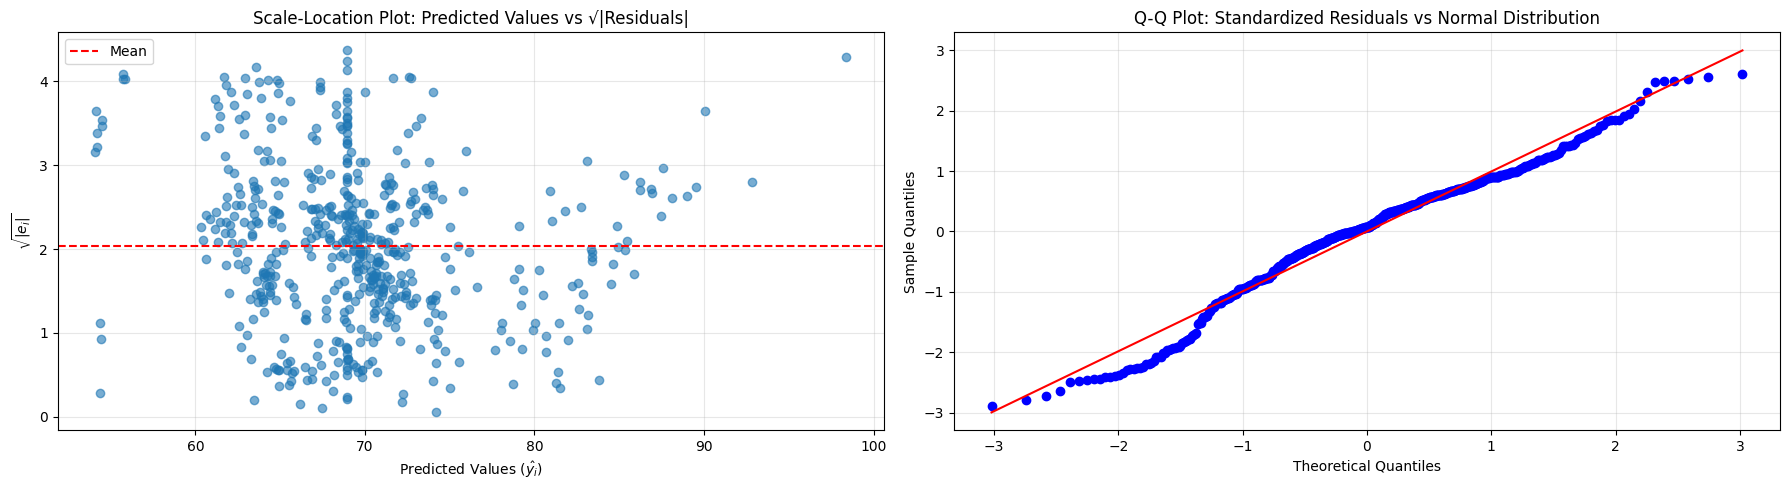


Residual Statistics:
Mean of residuals: -0.0849
Std of residuals: 6.5576
Mean of √|residuals|: 2.0365


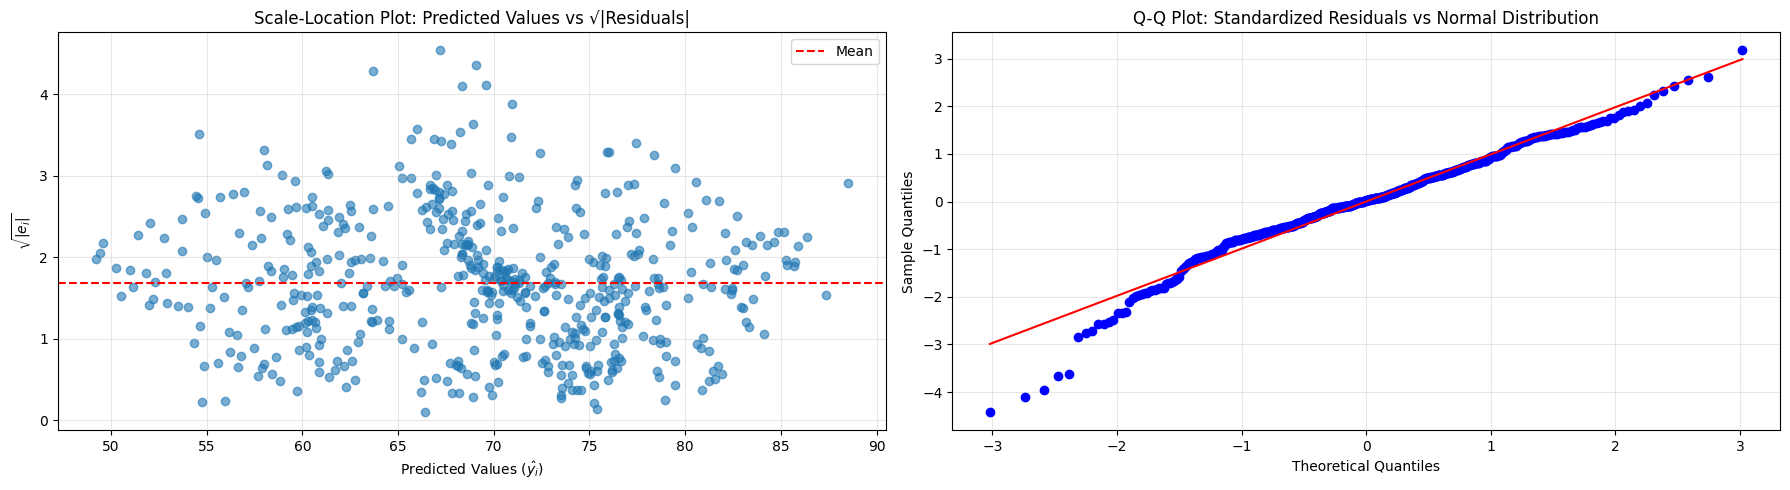


Residual Statistics:
Mean of residuals: 0.1537
Std of residuals: 4.6902
Mean of √|residuals|: 1.6876


In [16]:
for predictor in predictors_sets.values():
    X_train_A = train_data[predictor]
    y_train_A = train_data['Life expectancy']

    X_test_A = test_data[predictor]
    y_test_A = test_data['Life expectancy']

    lm_A = LinRegModel()
    lm_A.fit(X_train_A, y_train_A)

    y_pred = lm_A.predict(X_test_A)
    residuals = y_test_A.values.flatten() - y_pred

    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    # Square-root of absolute residuals vs predicted values
    axes[0].scatter(y_pred, np.sqrt(np.abs(residuals)), alpha=0.6)
    axes[0].set_xlabel('Predicted Values ($\hat{y_i}$)')
    axes[0].set_ylabel('$\sqrt{|e_i|}$')
    axes[0].set_title('Scale-Location Plot: Predicted Values vs √|Residuals|')
    axes[0].axhline(y=np.mean(np.sqrt(np.abs(residuals))), color='r', linestyle='--', label='Mean')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Q-Q plot
    standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

    stats.probplot(standardized_residuals, dist="norm", plot=axes[1])
    axes[1].set_title('Q-Q Plot: Standardized Residuals vs Normal Distribution')
    axes[1].set_xlabel('Theoretical Quantiles')
    axes[1].set_ylabel('Sample Quantiles')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"\nResidual Statistics:")
    print(f"Mean of residuals: {np.mean(residuals):.4f}")
    print(f"Std of residuals: {np.std(residuals):.4f}")
    print(f"Mean of √|residuals|: {np.mean(np.sqrt(np.abs(residuals))):.4f}")

## Task 6: Regularization and Ridge Regression Implementation

### Description
This task focuses on implementing Ridge regression and analyzing the effects of regularization on model performance. You will compare Ridge regression results with standard linear regression and evaluate its impact on different predictor sets.

`Note:` If you didn't do it for the classical linear model, you need here to normalize your dataset column wise before applying ridge regression (why is that so?).

### Exercises

#### 1. **Implement Ridge Regression**:
   - Write a class `RidgeRegModel` that includes the same methods as the `LinRegModel` class.
     - `fit`: fit a Ridge regression model using the closed-form solution (see lecture slides).
     - `predict`: predict outcomes for a given dataset.
     - `evaluate`: evaluate the model performance using MSE and $R^2$ metrics.

  The class will have contain a regularization parameter `plambda` as an attribute. Note that we make use of class heritage to define `RidgeRegModel` so we do not need to redefine `predict` and `evaluate`.



> We need to normalize the dataset column-wise before applying Ridge regression because Ridge regression adds a penalty term to the loss function that is proportional to the square of the magnitude of the coefficients. If the features are on different scales, the penalty will disproportionately affect features with larger scales, leading to biased coefficient estimates. Normalizing the features ensures that each feature contributes equally to the penalty term, allowing for a fair comparison and more effective regularization across all features.

In [17]:
class RidgeRegModel(LinRegModel):
    def __init__(self):
        """Initialize the Linear Regression model."""
        super().__init__()
        self._lambda = None

    def __str__(self):
        """
        output
        """
        return f"Lambda: {self._lambda}\n" + super().__str__()

    def fit(self, X, y, _lambda):
        """
        Train the linear regression model using the closed-form solution.

        Parameters:
        X: np.ndarray
            The feature matrix (shape: (n_samples, n_features)).
        y: np.ndarray
            The target vector (shape: (n_samples)).
        """
        self._lambda = _lambda
        X = np.array(X.values, dtype=np.float64)
        y = np.array(y.values, dtype=np.float64)
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        penalty_matrix = np.identity(X.shape[1]) * _lambda
        penalty_matrix[0, 0] = 0

        self.coefficients = (np.linalg.inv(X.T @ X + penalty_matrix) @ X.T @ y).flatten()
        self.variables = ['Intercept'] + [f'X{i}' for i in range(1, X.shape[1])]

#### 2. **Train and Evaluate on Predictor Sets**:
   - Use the same predictor sets as in Task 4:
     - **Set A (Healthcare and Mortality)**
     - **Set B (Lifestyle and Education)**
     - **Set C (Economic Factors)**
     - **Set D (Union of A, B and C)**
   - Train and evaluate the `RidgeRegModel` on the training and testing sets for each predictor set for a value of `_lambda`


In [18]:
## Normalize the data column-wise
from sklearn.preprocessing import StandardScaler

## Predictor variables
predictors_sets = {
    "Set A": ["Adult Mortality", "infant deaths", "Total expenditure"],
    "Set B": ["Alcohol", "BMI", "Schooling"],
    "Set C": ["GDP", "Income composition of resources", "Population"]
}

predictors_sets["Set D"] = [x for l_var in predictors_sets.values() for x in l_var]

## Running the models
results = {}
for set_name, predictors in predictors_sets.items():
    print(f"\nEvaluating model with {set_name} predictors: {predictors}")
    
    X_train = train_data[predictors]
    y_train = train_data['Life expectancy']

    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=predictors)
    
    X_test = test_data[predictors]
    y_test = test_data['Life expectancy']
    
    X_test = pd.DataFrame(scaler.transform(X_test), columns=predictors)
    
    lm = RidgeRegModel()
    lm.fit(X_train, y_train, _lambda=0.42)
    
    metrics = lm.evaluate(X_test, y_test)
    
    results[set_name] = metrics
    
    print(lm)
    
    print(f"Results for {set_name}: MSE = {metrics['MSE']}, R-squared = {metrics['rsquared']}")



Evaluating model with Set A predictors: ['Adult Mortality', 'infant deaths', 'Total expenditure']
Lambda: 0.42
Coefficients:
[67.59820453 -6.31666435 -1.32933481  1.23839689]
Variables: Intercept, X1, X2, X3
Results for Set A: MSE = 40.032285050687584, R-squared = 0.5327134195790596

Evaluating model with Set B predictors: ['Alcohol', 'BMI', 'Schooling']
Lambda: 0.42
Coefficients:
[67.59820453  0.23540469  3.20586103  4.92974807]
Variables: Intercept, X1, X2, X3
Results for Set B: MSE = 37.249538998605644, R-squared = 0.5651956994491893

Evaluating model with Set C predictors: ['GDP', 'Income composition of resources', 'Population']
Lambda: 0.42
Coefficients:
[67.59820453  2.32962909  5.00265046 -0.11946489]
Variables: Intercept, X1, X2, X3
Results for Set C: MSE = 43.01256067008597, R-squared = 0.49792542780848614

Evaluating model with Set D predictors: ['Adult Mortality', 'infant deaths', 'Total expenditure', 'Alcohol', 'BMI', 'Schooling', 'GDP', 'Income composition of resources', 


#### 3. **Comparison**:
   1. Compare the performance of Ridge regression with standard linear regression for each predictor set, you can try first with parameters $\lambda=5$ and $\lambda =20$. What is the impact of increasing $\lambda$?
   2. For set D, Plot the values of the coefficients estimated, as well as the MSE, as a function of $\lambda$ from 0 to 40. What do you observe? 
   3. Evaluate the effect of tuning the $\lambda$ parameter on model coefficients and metrics.
      - How does regularization impact the coefficients of highly correlated predictors?
      - Which model (standard linear regression or Ridge regression) performs better on the testing data? Why?
      - How does the choice of $\lambda$ influence the balance between bias and variance in the model?



> 1. Looking at all predictor sets using $\lambda=20$ has a worse MSE and R-squared compared to $\lambda=5$. Increasing $\lambda$ increases the regularization effect, which can lead to underfitting if set too high. This results in a model that is too simplistic and fails to capture the underlying patterns in the data, leading to poorer performance on the test set. That the performance with ridge regression only gets worse with increasing $\lambda$ from zero on, could mean that the normal regression is already underfitted to the problem. 

> 2. The coefficients only change slightly as $\lambda$ increases from 0 to 40, most of them gradually decrease in magnitude due to the regularization effect.

> 3. Answers:
> - Regularization tends to shrink the coefficients of highly correlated predictors towards zero, effectively reducing their impact on the model. This helps to mitigate multicollinearity issues and leads to a more stable model.
> - The standard linear regression performs better than ridge regression with $\lambda > 0$ on the testing data. The reason could be that already the standard linear regression underfitts on the training data, therefore ridge regression which should mitigate overfitting, further increases the already existing underfitting.
> - The choice of $\lambda$ influences the balance between bias and variance in the model. A small $\lambda$ results in a model that closely fits the training data (low bias, high variance), while a large $\lambda$ leads to a simpler model with higher bias but lower variance. Finding an optimal $\lambda$ is crucial for achieving a good trade-off between bias and variance, normally that should lead to improving model performance through better generalization for unseen data.


Evaluating Ridge Regression model with Set A predictors: ['Adult Mortality', 'infant deaths', 'Total expenditure']


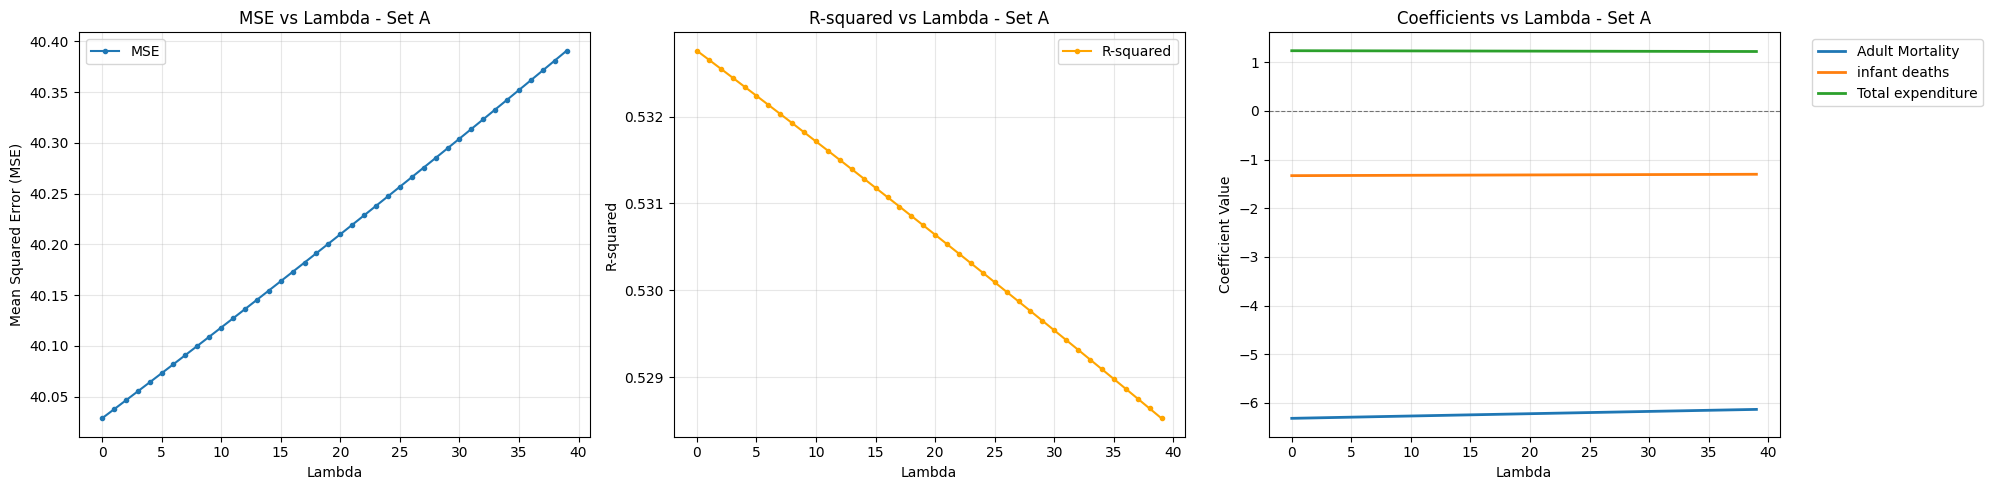


Evaluating Ridge Regression model with Set B predictors: ['Alcohol', 'BMI', 'Schooling']


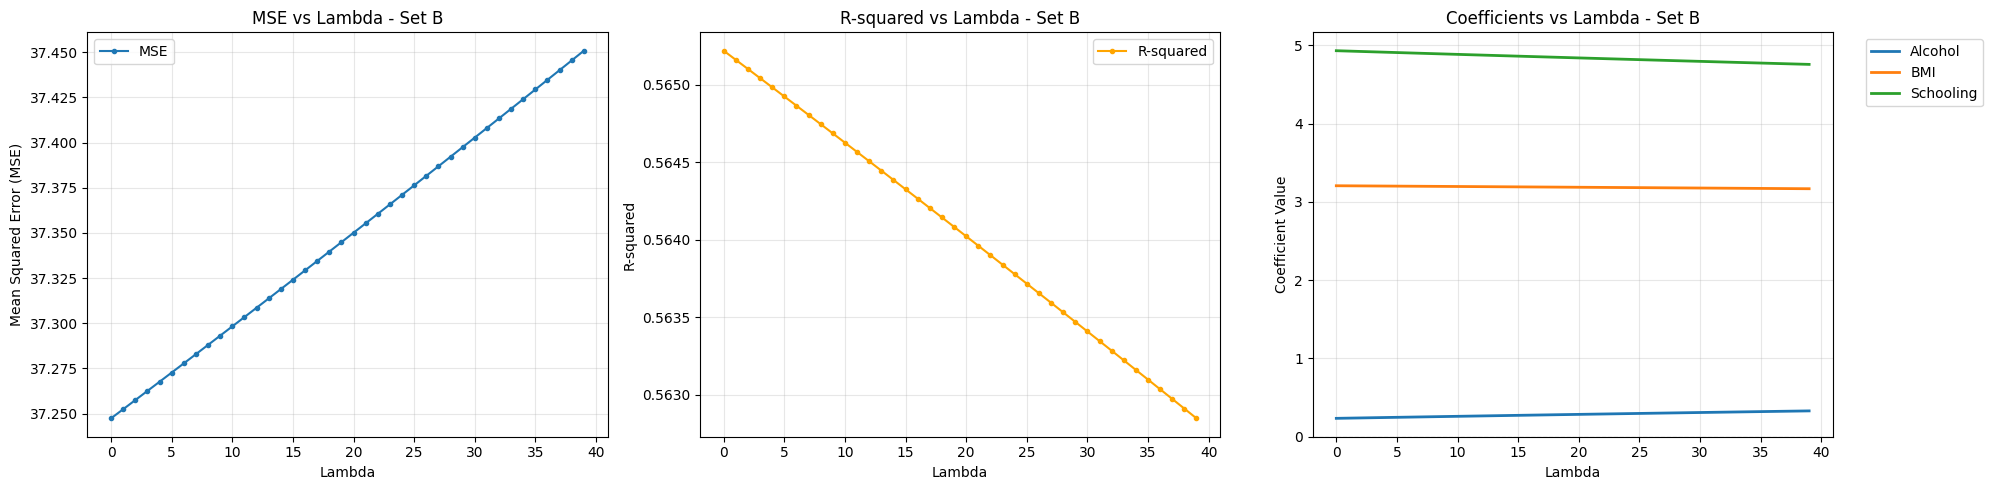


Evaluating Ridge Regression model with Set C predictors: ['GDP', 'Income composition of resources', 'Population']


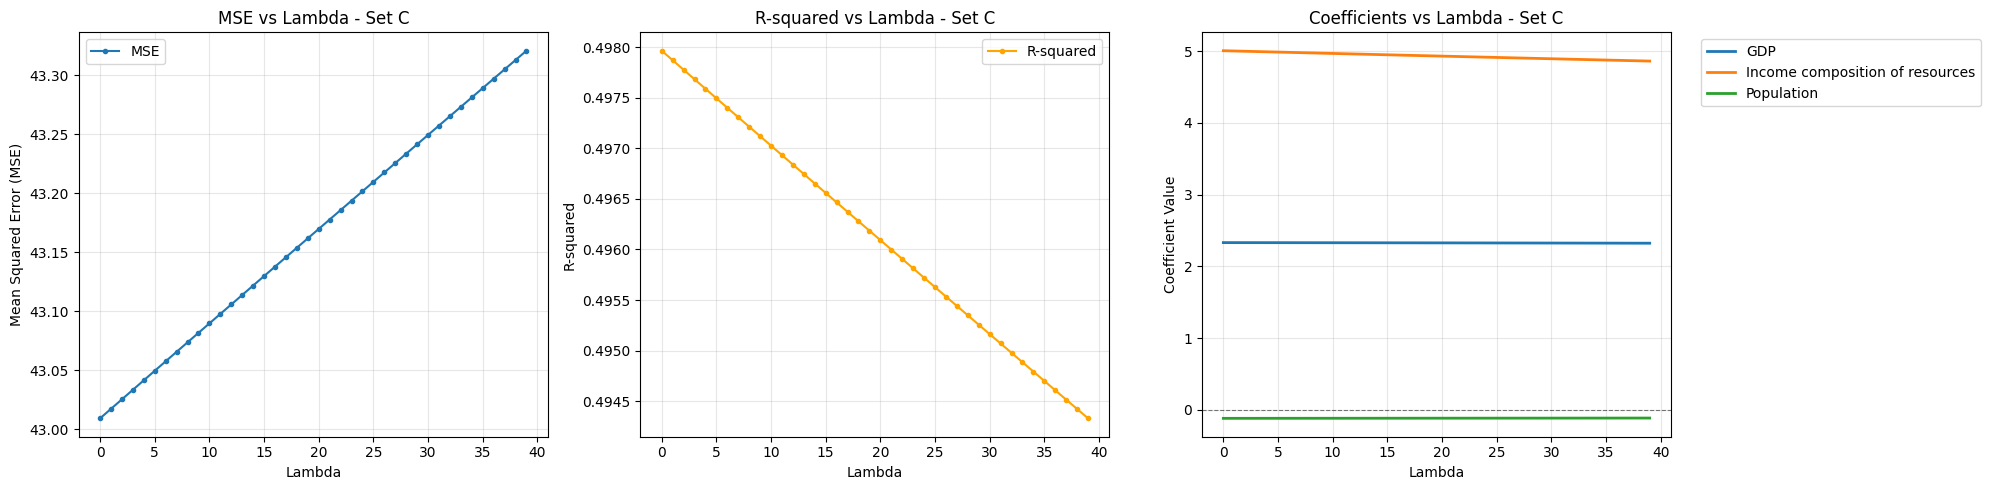


Evaluating Ridge Regression model with Set D predictors: ['Adult Mortality', 'infant deaths', 'Total expenditure', 'Alcohol', 'BMI', 'Schooling', 'GDP', 'Income composition of resources', 'Population']


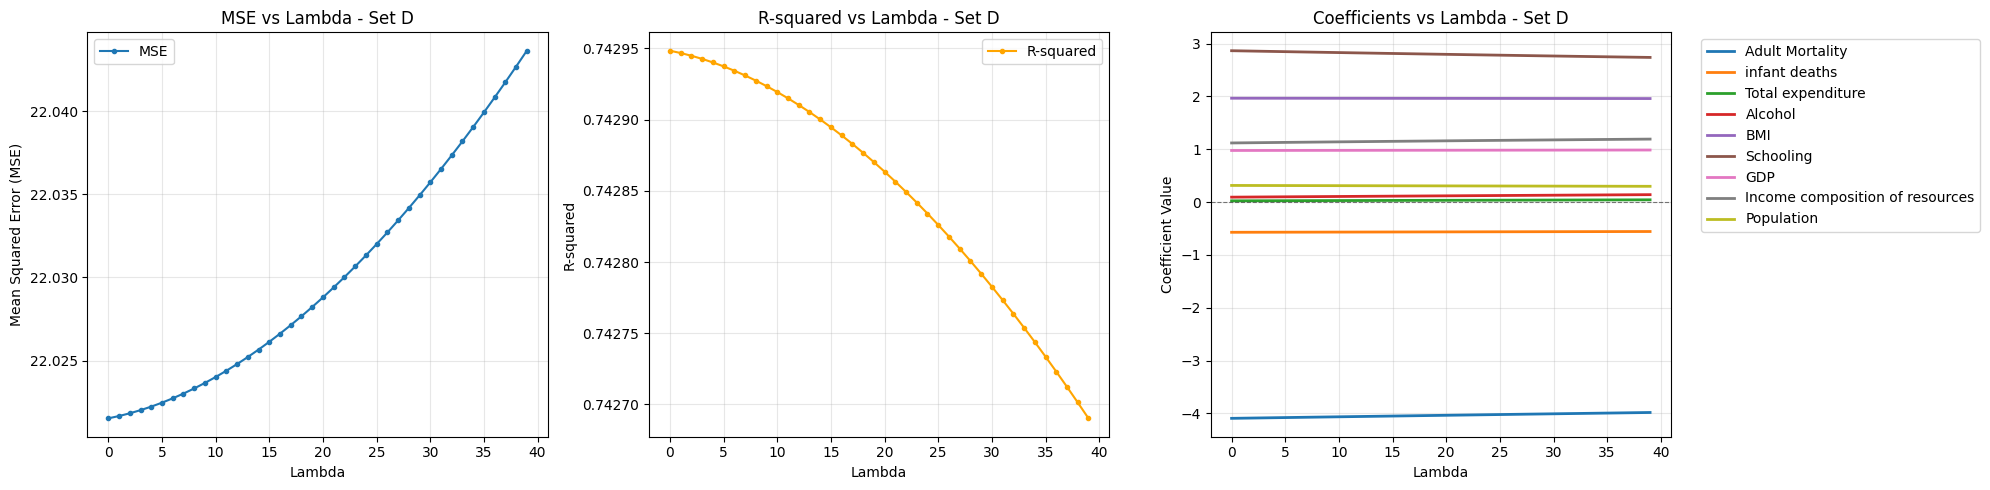

In [19]:
_lambdas = np.arange(0, 40, 1)

for set_name, predictors in predictors_sets.items():
    print(f"\nEvaluating Ridge Regression model with {set_name} predictors: {predictors}")
    results = []
    coefficients_history = []
    
    for _lambda in _lambdas:    
        X_train = train_data[predictors]
        y_train = train_data['Life expectancy']

        scaler = StandardScaler()
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=predictors)
        
        X_test = test_data[predictors]
        y_test = test_data['Life expectancy']
        
        X_test = pd.DataFrame(scaler.transform(X_test), columns=predictors)
        
        lm = RidgeRegModel()
        lm.fit(X_train, y_train, _lambda=_lambda)
        
        metrics = lm.evaluate(X_test, y_test)
        
        results.append(metrics)
        coefficients_history.append(lm.coefficients[1:])

    coefficients_array = np.array(coefficients_history)
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    # Plot 1: MSE vs Lambda
    mse_values = [result['MSE'] for result in results]
    axes[0].plot(_lambdas, mse_values, marker='o', markersize=3, label='MSE')
    axes[0].set_xlabel('Lambda')
    axes[0].set_ylabel('Mean Squared Error (MSE)')
    axes[0].set_title(f'MSE vs Lambda - {set_name}')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Plot 2: R-squared vs Lambda
    rsquared_values = [result['rsquared'] for result in results]
    axes[1].plot(_lambdas, rsquared_values, marker='o', markersize=3, label='R-squared', color='orange')
    axes[1].set_xlabel('Lambda')
    axes[1].set_ylabel('R-squared')
    axes[1].set_title(f'R-squared vs Lambda - {set_name}')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Coefficients vs Lambda
    for i, predictor in enumerate(predictors):
        axes[2].plot(_lambdas, coefficients_array[:, i], label=predictor, linewidth=2)
    axes[2].set_xlabel('Lambda')
    axes[2].set_ylabel('Coefficient Value')
    axes[2].set_title(f'Coefficients vs Lambda - {set_name}')
    axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[2].grid(True, alpha=0.3)
    axes[2].axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

    plt.tight_layout()
    plt.show()


### Summary. 


- After those different analysis, provide a short summary on the data and explain which sets of variables are providing a good prediction of life expectancy and what are their relative importance (based on the coefficients). 

- Based on those correlation, could you make some recommendation on public policies that could improve life expectancy?


> The Schooling, BMI and Adult Mortality all have a strong influence on the life expectancy, based on their coefficients. All three have at least two times higher coefficients in absolute values than the remaining features in set D, indicating a higher relative importane. That would probably be a good set of variables to predict the life expectancy.

> Based on the correlations observed, several public policy recommendations can be made to improve life expectancy. Firstly, investing in education to increase schooling levels can have a significant positive impact. Additional investments in healthcare infrastructure and preventive care programs could help reduce adult mortality and improve BMI.

## Task 7: Comparison with scikit-learn  (optional)

### Description
This task involves comparing the performance of the manually implemented models (`LinRegModel` and `RidgeRegModel`) with their counterparts from the `scikit-learn` library.
You will see how it is possible to perform classical steps of the analysis and also model selection very easily using this generic framework.

### Exercises

1. Run again the estimation within the corresponding sklearn modules.
2. Use the function of scikit-learn `model_selection` to perform feature selection and parameter tuning automatically. You can perform leave-one-out or fold cross validation. 
3. (optional question within the optional task): Perform polynomial regression of degree $p$ for $p$ ranging from 1 to 3 and select the best set of parameter. Does the accuracy improves?


> The accuracy improves with polynomial regression of degree 3 compared to degree 1. Thus supporting the previous oberservation that the standard linear regression is underfitted to the problem.

In [20]:
### 
### The set of modules you can use from scikit-learn
###
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut, GridSearchCV, KFold, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [21]:
# Predictor sets
predictors_sets = {
    "Set A": ["Adult Mortality", "infant deaths", "Total expenditure"],
    "Set B": ["Alcohol", "BMI", "Schooling"],
    "Set C": ["GDP", "Income composition of resources", "Population"]
}

predictors_sets["Set D"] = [x for l_var in predictors_sets.values() for x in l_var]

for set_name, predictors in predictors_sets.items():
    print(f"\n{set_name} predictors: {predictors}")
    
    X_train = train_data[predictors]
    y_train = train_data['Life expectancy']
    X_test = test_data[predictors]
    y_test = test_data['Life expectancy']
    
    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Linear Regression - MSE: {mse:.4f}, R²: {r2:.4f}")
    print(f"Coefficients: {lr_model.coef_}")
    print(f"Intercept: {lr_model.intercept_:.4f}")

print("SKLEARN RIDGE REGRESSION RESULTS (λ=5)")

for set_name, predictors in predictors_sets.items():
    print(f"\n{set_name} predictors: {predictors}")
    
    X_train = train_data[predictors]
    y_train = train_data['Life expectancy']
    X_test = test_data[predictors]
    y_test = test_data['Life expectancy']
    
    # Normalize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Ridge Regression with λ=5
    ridge_model = Ridge(alpha=5.0)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred = ridge_model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Ridge Regression - MSE: {mse:.4f}, R²: {r2:.4f}")
    print(f"Coefficients: {ridge_model.coef_}")
    print(f"Intercept: {ridge_model.intercept_:.4f}")


Set A predictors: ['Adult Mortality', 'infant deaths', 'Total expenditure']
Linear Regression - MSE: 40.0286, R²: 0.5328
Coefficients: [-0.04614426 -0.00966952  0.55857443]
Intercept: 72.7892

Set B predictors: ['Alcohol', 'BMI', 'Schooling']
Linear Regression - MSE: 37.2474, R²: 0.5652
Coefficients: [0.05897237 0.1701874  1.39832223]
Intercept: 45.3004

Set C predictors: ['GDP', 'Income composition of resources', 'Population']
Linear Regression - MSE: 43.0092, R²: 0.4980
Coefficients: [ 2.23972726e-04  2.10735189e+01 -2.03982609e-09]
Intercept: 54.1027

Set D predictors: ['Adult Mortality', 'infant deaths', 'Total expenditure', 'Alcohol', 'BMI', 'Schooling', 'GDP', 'Income composition of resources', 'Population']
Linear Regression - MSE: 22.0215, R²: 0.7429
Coefficients: [-2.98978404e-02 -4.16510353e-03  1.02827373e-02  2.32228473e-02
  1.04273884e-01  8.11976616e-01  9.38021872e-05  4.70800701e+00
  5.35839908e-09]
Intercept: 56.4593
SKLEARN RIDGE REGRESSION RESULTS (λ=5)

Set A pre

CROSS-VALIDATION AND PARAMETER TUNING

Performing GridSearchCV with 5-fold cross-validation...
Testing 82 lambda values from 0.1 to 40

Best lambda (alpha): 12.1000
Best CV MSE: 31.4003

Test Set Performance:
MSE: 22.0248
R²: 0.7429


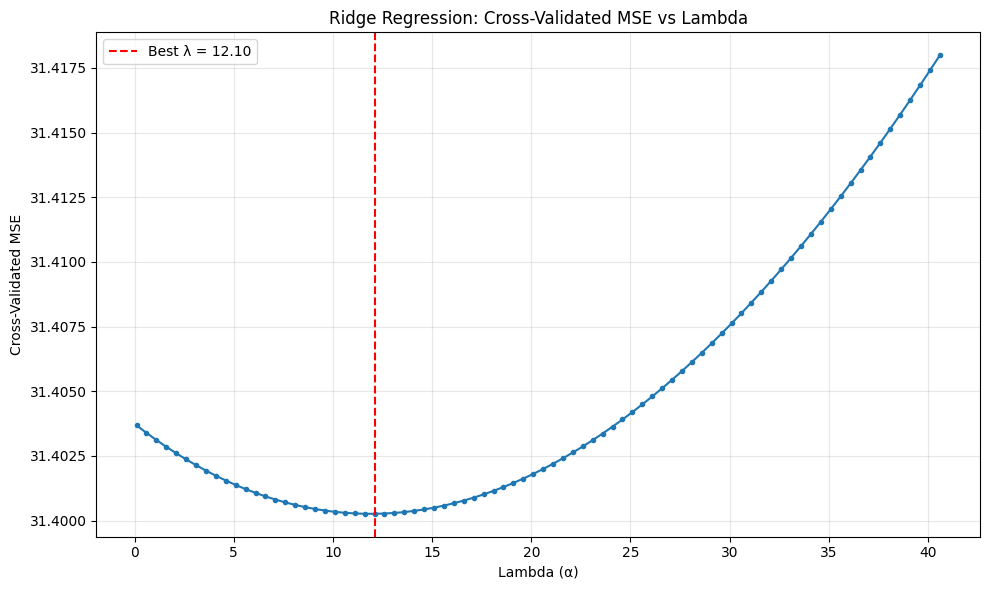

In [22]:
print("CROSS-VALIDATION AND PARAMETER TUNING")

# Use Set D (all predictors) for this analysis
predictors = predictors_sets["Set D"]
X_train = train_data[predictors]
y_train = train_data['Life expectancy']
X_test = test_data[predictors]
y_test = test_data['Life expectancy']

# Create a pipeline with scaling and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define parameter grid for lambda values
param_grid = {
    'ridge__alpha': np.arange(0.1, 41, 0.5)
}

# Perform 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=kfold, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

print(f"\nPerforming GridSearchCV with 5-fold cross-validation...")
print(f"Testing {len(param_grid['ridge__alpha'])} lambda values from 0.1 to 40")

grid_search.fit(X_train, y_train)

print(f"\nBest lambda (alpha): {grid_search.best_params_['ridge__alpha']:.4f}")
print(f"Best CV MSE: {-grid_search.best_score_:.4f}")

# Evaluate on test set
y_pred = grid_search.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"\nTest Set Performance:")
print(f"MSE: {test_mse:.4f}")
print(f"R²: {test_r2:.4f}")

# Plot cross-validation results
cv_results = grid_search.cv_results_
alphas = param_grid['ridge__alpha']
mean_scores = -cv_results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_scores, marker='o', markersize=3)
plt.xlabel('Lambda (α)')
plt.ylabel('Cross-Validated MSE')
plt.title('Ridge Regression: Cross-Validated MSE vs Lambda')
plt.grid(True, alpha=0.3)
plt.axvline(x=grid_search.best_params_['ridge__alpha'], color='r', 
            linestyle='--', label=f"Best λ = {grid_search.best_params_['ridge__alpha']:.2f}")
plt.legend()
plt.tight_layout()
plt.show()

POLYNOMIAL REGRESSION ANALYSIS
Polynomial Degree: 1
Number of features created: 9
Best lambda: 10.0000
Best CV MSE: 31.4003
Test MSE: 22.0240
Test R²: 0.7429
Polynomial Degree: 2
Number of features created: 54
Best lambda: 1.0000
Best CV MSE: 17.3813
Test MSE: 15.4033
Test R²: 0.8202
Polynomial Degree: 3
Number of features created: 219
Best lambda: 5.0000
Best CV MSE: 15.1605
Test MSE: 13.5510
Test R²: 0.8418
Polynomial Degree: 4
Number of features created: 714
Best lambda: 20.0000
Best CV MSE: 15.5142
Test MSE: 16.3193
Test R²: 0.8095
Polynomial Degree: 5
Number of features created: 2001
Best lambda: 100.0000
Best CV MSE: 17.0997
Test MSE: 17.1271
Test R²: 0.8001
Polynomial Degree: 6
Number of features created: 5004
Best lambda: 100.0000
Best CV MSE: 17.4232
Test MSE: 20.6196
Test R²: 0.7593
Polynomial Degree: 7
Number of features created: 11439
Best lambda: 100.0000
Best CV MSE: 21.3304
Test MSE: 25.7445
Test R²: 0.6995
Polynomial Degree: 8
Number of features created: 24309
Best lamb

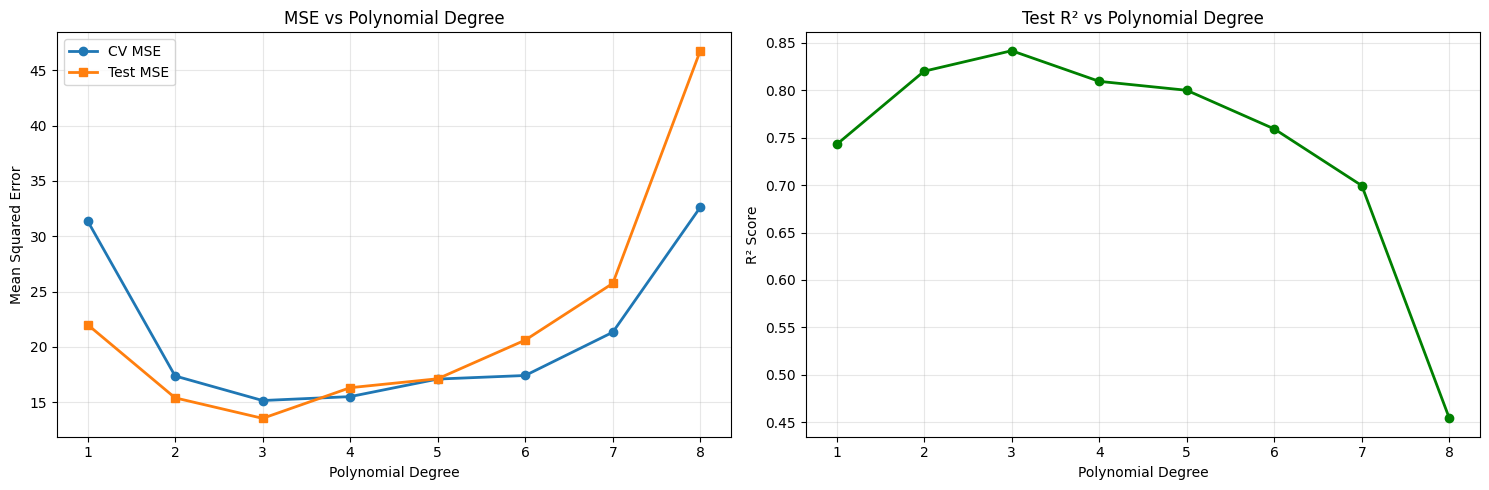

BEST MODEL
Polynomial Degree: 3
Number of Features: 219
Best Lambda: 5.0000
Test MSE: 13.5510
Test R²: 0.8418

The polynomial features improved accuracy!


In [ ]:
print("POLYNOMIAL REGRESSION ANALYSIS")

# Use Set D for polynomial regression
predictors = predictors_sets["Set D"]
X_train = train_data[predictors]
y_train = train_data['Life expectancy']
X_test = test_data[predictors]
y_test = test_data['Life expectancy']

poly_results = []

for degree in range(1, 9):
    print(f"Polynomial Degree: {degree}")
    
    # Create pipeline with polynomial features, scaling, and Ridge regression
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('scaler', StandardScaler()),
        ('ridge', Ridge())
    ])
    
    # Parameter grid for Ridge alpha
    param_grid = {
        'ridge__alpha': [0.01, 0.1, 1, 5, 10, 20, 50, 100]
    }
    
    # 5-fold cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=kfold,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    # Evaluate on test set
    y_pred = grid_search.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)
    
    # Store results
    poly_results.append({
        'degree': degree,
        'best_alpha': grid_search.best_params_['ridge__alpha'],
        'cv_mse': -grid_search.best_score_,
        'test_mse': test_mse,
        'test_r2': test_r2,
        'n_features': grid_search.best_estimator_.named_steps['poly'].n_output_features_
    })
    
    print(f"Number of features created: {poly_results[-1]['n_features']}")
    print(f"Best lambda: {poly_results[-1]['best_alpha']:.4f}")
    print(f"Best CV MSE: {poly_results[-1]['cv_mse']:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Test R²: {test_r2:.4f}")

# Summary comparison
print("POLYNOMIAL REGRESSION SUMMARY")

results_df = pd.DataFrame(poly_results)
print(results_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

degrees = [r['degree'] for r in poly_results]
cv_mses = [r['cv_mse'] for r in poly_results]
test_mses = [r['test_mse'] for r in poly_results]
test_r2s = [r['test_r2'] for r in poly_results]

# Plot MSE comparison
axes[0].plot(degrees, cv_mses, marker='o', label='CV MSE', linewidth=2)
axes[0].plot(degrees, test_mses, marker='s', label='Test MSE', linewidth=2)
axes[0].set_xlabel('Polynomial Degree')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_title('MSE vs Polynomial Degree')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(degrees)

# Plot R² comparison
axes[1].plot(degrees, test_r2s, marker='o', color='green', linewidth=2)
axes[1].set_xlabel('Polynomial Degree')
axes[1].set_ylabel('R² Score')
axes[1].set_title('Test R² vs Polynomial Degree')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(degrees)

plt.tight_layout()
plt.show()

# Find best model
best_idx = np.argmin([r['test_mse'] for r in poly_results])
best_model = poly_results[best_idx]

print("BEST MODEL")
print(f"Polynomial Degree: {best_model['degree']}")
print(f"Number of Features: {best_model['n_features']}")
print(f"Best Lambda: {best_model['best_alpha']:.4f}")
print(f"Test MSE: {best_model['test_mse']:.4f}")
print(f"Test R²: {best_model['test_r2']:.4f}")